In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn  as sns

In [15]:
missing_value = ["NaN",np.nan]
df = pd.read_excel("C:\\Users\\gubra\\Downloads\\rollingsales_manhattan.xlsx", engine='openpyxl', na_values= missing_value, header = 4)
#df.drop([0,1,2,3], axis=0,inplace= True)
print(df)


       BOROUGH              NEIGHBORHOOD         BUILDING CLASS CATEGORY  \
0            1             ALPHABET CITY         01 ONE FAMILY DWELLINGS   
1            1             ALPHABET CITY         02 TWO FAMILY DWELLINGS   
2            1             ALPHABET CITY         02 TWO FAMILY DWELLINGS   
3            1             ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS   
4            1             ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS   
...        ...                       ...                             ...   
20346        1  WASHINGTON HEIGHTS UPPER              22 STORE BUILDINGS   
20347        1  WASHINGTON HEIGHTS UPPER              22 STORE BUILDINGS   
20348        1  WASHINGTON HEIGHTS UPPER              22 STORE BUILDINGS   
20349        1  WASHINGTON HEIGHTS UPPER           29 COMMERCIAL GARAGES   
20350        1  WASHINGTON HEIGHTS UPPER           29 COMMERCIAL GARAGES   

      TAX CLASS AT PRESENT  BLOCK  LOT  EASEMENT BUILDING CLASS AT PRESENT  \
0        

In [16]:
na_count = df.isnull().sum()
top_3_na = na_count.nlargest(3)
print(top_3_na)

EASEMENT             20351
LAND SQUARE FEET     18625
GROSS SQUARE FEET    18625
dtype: int64


In [17]:
df_clean = df.drop(columns=["EASEMENT", "LAND SQUARE FEET","GROSS SQUARE FEET"])
df_clean.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,46,A4,347 EAST 4TH STREET,NaN,10009,1.0,0.0,1.0,1900.0,1,A4,399000,2022-09-29
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,372,36,S2,19 AVENUE D,NaN,10009,2.0,1.0,3.0,1900.0,1,S2,1,2023-01-20
2,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,1,S2,110 AVENUE C,NaN,10009,2.0,1.0,3.0,1901.0,1,S2,2999999,2022-09-15
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,16,C1,326 EAST 4TH STREET,NaN,10009,10.0,0.0,10.0,1899.0,2,C1,16800000,2022-08-04
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,373,17,C1,328 EAST 4TH STREET,NaN,10009,10.0,0.0,10.0,1900.0,2,C1,16800000,2022-08-04
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,C4,"719 EAST SIXTH STREET, 1B",NaN,10009,20.0,0.0,20.0,1900.0,2,C4,158822,2022-09-27
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,C2,271 EAST 7TH STREET,NaN,10009,5.0,0.0,5.0,1900.0,2,C2,0,2022-08-05
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,C2,271 EAST 7TH STREET,NaN,10009,5.0,0.0,5.0,1900.0,2,C2,0,2022-05-10
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,379,25,C7,"434 EAST 10TH STREET, 4",NaN,10009,7.0,1.0,8.0,1920.0,2,C7,1635000,2022-08-05
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,389,45,C4,631 EAST 6TH STREET,NaN,10009,10.0,0.0,10.0,1900.0,2,C4,5250000,2022-06-16


In [18]:
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT               True
BLOCK                             False
LOT                               False
EASEMENT                           True
BUILDING CLASS AT PRESENT          True
ADDRESS                           False
APARTMENT NUMBER                   True
ZIP CODE                          False
RESIDENTIAL UNITS                  True
COMMERCIAL UNITS                   True
TOTAL UNITS                        True
LAND SQUARE FEET                   True
GROSS SQUARE FEET                  True
YEAR BUILT                         True
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [19]:
print(df.columns)

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


# Where in Manhattan is the most/least expensive real estate located?
#### in the diagram below we can see the first five most expensive places to live in Manhattan. after that we have also a diagram who show to us the least expensive places to live in Manhattan

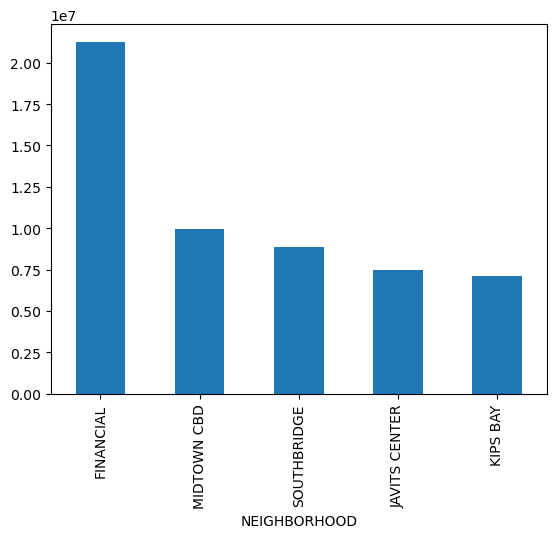

<bound method NDFrame.head of NEIGHBORHOOD
FINANCIAL        2.125884e+07
MIDTOWN CBD      9.944450e+06
SOUTHBRIDGE      8.883329e+06
JAVITS CENTER    7.462519e+06
KIPS BAY         7.121979e+06
Name: SALE PRICE, dtype: float64>


In [20]:
df_clean["SALE PRICE"] = pd.to_numeric(df_clean["SALE PRICE"], errors='coerce')
the_neighborhood_price=df_clean.groupby('NEIGHBORHOOD')['SALE PRICE'].mean()

the_neighborhood_price =the_neighborhood_price.sort_values(ascending=False).head()


the_neighborhood_price.plot(kind="bar", y="SALE PRICE", x="NEIGHBORHOOD")

plt.show()

print(the_neighborhood_price.head)

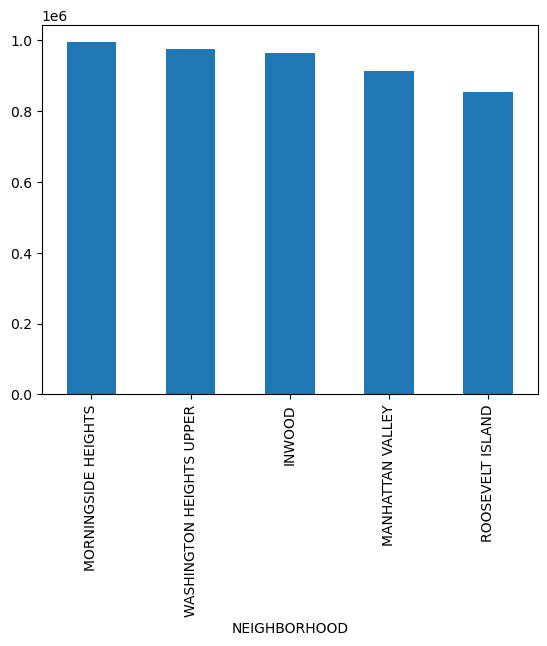

In [22]:
df_clean["SALE PRICE"] = pd.to_numeric(df_clean["SALE PRICE"], errors='coerce')

the_neighborhood_price=df_clean.groupby('NEIGHBORHOOD')['SALE PRICE'].mean()

the_neighborhood_price =the_neighborhood_price.sort_values(ascending=False).tail()
the_neighborhood_price.plot(kind="bar", y="SALE PRICE", x="NEIGHBORHOOD")
plt.show()



# What is the relation-ship between the sales price and gross square feet?

#### Now we will create a scatter plot to visually analyze the relationship between Sale Price and Gross Square feet. We will also calc the Correlation to see if there any relationship between the sale prive and their size in square feet(we get that the corr is 0.277774, it means there is no lie´near relationships betweem the variables)

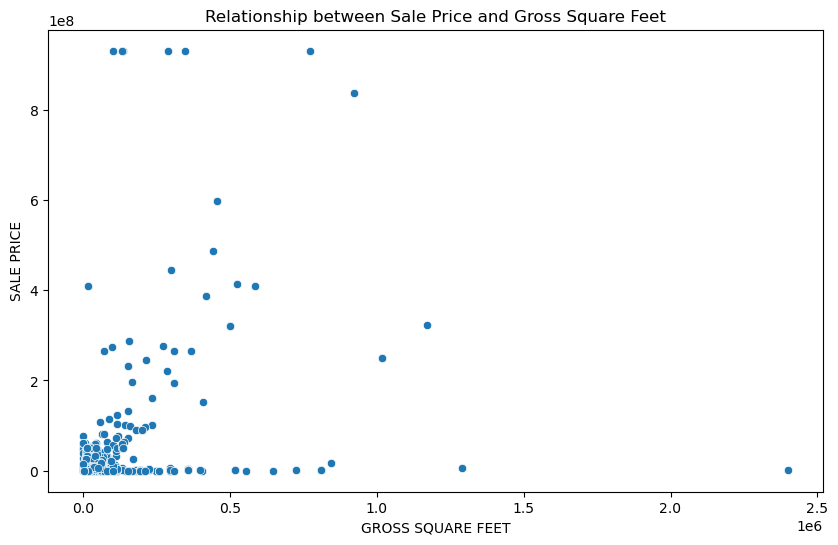

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GROSS SQUARE FEET', y='SALE PRICE')
plt.title('Relationship between Sale Price and Gross Square Feet')
plt.show()



In [23]:
corr = df['SALE PRICE'].corr(df['GROSS SQUARE FEET'])
print("Correlation between SALE PRICE and GROSS SQUARE FEET is", corr)


Correlation between SALE PRICE and GROSS SQUARE FEET is 0.27749774475439737
